In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,r2_score
from lightgbm import LGBMRegressor
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [5]:
df = pd.read_csv('train.csv')
df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [6]:
df.isnull().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

In [7]:
df.duplicated().sum()

0

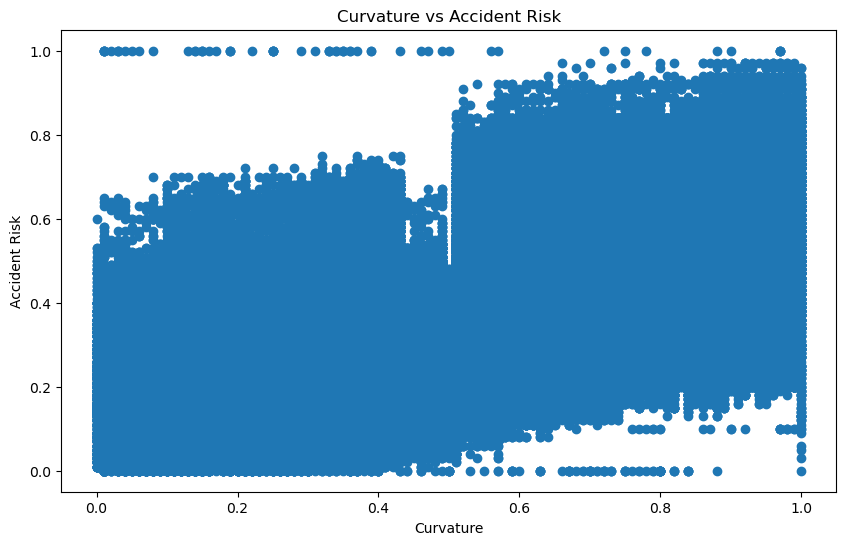

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df['curvature'], df['accident_risk'])
plt.xlabel('Curvature')
plt.ylabel('Accident Risk')
plt.title('Curvature vs Accident Risk')
plt.show()

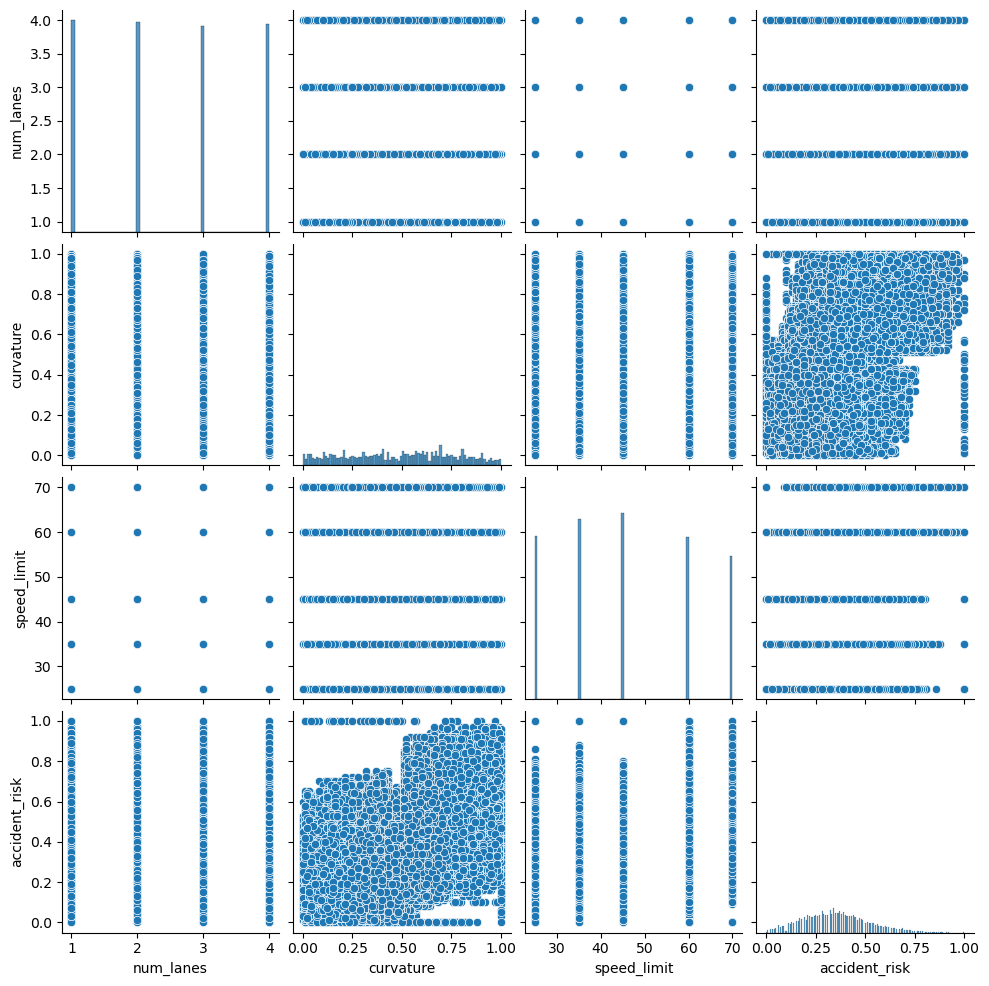

In [9]:
import seaborn as sns
sns.pairplot(df[['num_lanes', 'curvature', 'speed_limit', 'accident_risk']])


In [10]:
df = df.drop(['id'], axis=1)
df.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [11]:
df.columns.tolist()

['road_type',
 'num_lanes',
 'curvature',
 'speed_limit',
 'lighting',
 'weather',
 'road_signs_present',
 'public_road',
 'time_of_day',
 'holiday',
 'school_season',
 'num_reported_accidents',
 'accident_risk']

In [12]:
X = df.drop('accident_risk', axis=1)
y = df['accident_risk']

In [13]:
categorical = ['road_type', 'lighting', 'weather', 'time_of_day']
numeric = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']
boolean = ['road_signs_present', 'public_road', 'holiday', 'school_season']

In [14]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric),
    ('cat', OneHotEncoder(), categorical),
    ('bool', 'passthrough', boolean)
])

In [15]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('lgbm', LGBMRegressor(n_estimators=500, learning_rate=0.05, random_state=42))
])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 20
[LightGBM] [Info] Start training from score 0.352605


In [20]:
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.043672252048225106
R^2 Score: 0.8853656882294874
Root Mean Squared Error: 0.056261042347154504
